# 간단한 분류 알고리즘 훈련

**목차**
* 2.1. 인공 뉴런: 초기 머신 러닝의 간단한 역사
* 2.2. 파이썬으로 퍼셉트론 하습 알고리즘 구현
* 2.2. 적응형 선형 뉴런과 학습의 수렴

**주제**
* 머신러닝의 알고리즘을 직관적으로 이해하기
* 판다스, 넘파이, 맷플롯립을 사용하여 데이터를 다루는 방법을 익히기
* 파이썬으로 선형 분류 알고리즘을 구현하기

2.1 인공 뉴런: 초기 머신 러닝의 간단한 역사

1943년 워렌 맥컬록과 월터 피츠는 인공지능 설계를 위해 뇌의 동작 방식을 이해하려는 첫 시도로 간소화된 뇌의 뉴런 개념, 즉 맥컬록-피츠 뉴런을 발표했습니다. 이들은 뉴런을 이진 출력을 내는 간단한 논리 회로로 표현했습니다. 수상 돌기에 도착하는 여러 신호가 세포체에서 합쳐지고, 이 합쳐진 신호가 특정 임계값을 넘으면 출력 신호가 생성되어 축삭 돌기를 통해 전달됩니다.

프랑크 로젠블라트는 이 맥컬록-피츠 뉴런 모델을 기반으로 퍼셉트론 학습 개념을 발표했습니다. 로젠블라트는 퍼셉트론 규칙에서 자동으로 최적의 가중치를 학습하는 알고리즘을 제안했습니다. 이 가중치는 뉴런의 출력 신호를 결정하기 위해 입력 특성에 곱하는 계수로, 이 알고리즘을 사용하면 새로운 데이터 포인트가 한 클래스에 속하는지 아닌지를 예측할 수 있습니다.

### 2.1.1 인공뉴런의 수학적 정의

퍼셉트론은 간단한 선형 이진 분류 알고리즘이다. 입력값과 가중치의 선형 조합을 계산하여 결과를 출력한다. 이 결과는 임계 함수를 적용하여 결정된다.

$$
w = \begin{bmatrix} w_1 \\ w_2 \\ w_3 \\ ... \\ w_m \end{bmatrix}, x = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ ... \\ x_m \end{bmatrix}
$$

퍼셉트론 알고리즘은 결정함수$\phi(z)$를 정의한다. 이 함수는 가중치의 선형 조합을 계산한 후 임계 함수를 적용하여 결과를 출력한다.

$$
\phi(z) = \begin{cases} 1 & \text{if } z \geq \theta \\ -1 & \text{otherwise} \end{cases}
$$

### 2.1.2 퍼셉트론의 학습 규칙

MCP 뉴런과 퍼셉트론의 차이점은 가중치를 자동으로 학습하는 능력이다. 이를 위해 로젠블라트는 학습 규칙을 제안했다. 이 규칙은 뉴런의 가중치를 조정하여 오분류된 표본을 올바르게 분류할 수 있도록 한다.

1. 가중치를 0 또는 작은 랜덤한 수로 초기화한다.
2. 각 훈련 샘플 $x^{(i)}$마다 다음을 수행한다.
    1. 출력값 $\hat{y}$를 계산한다.
    2. 가중치를 업데이트한다.

여기서 출력값은 계단 함수로 예측한 클래스 레이블이다. 가중치 벡터$w$에 있는 개발 가중치$w_{j}$를 업데이트하는 규칙은 다음과 같다.
$$
w_{j} := w_{j} + \Delta w_{j}\\
그리고 \Delta w_{j} = \eta(y^{(i)} - \hat{y}^{(i)})x_{j}^{(i)}
$$

업데디트값("델타")의 계산

$$
\Delta w_{j} = \eta(y^{(i)} - \hat{y}^{(i)})x_{j}^{(i)} \\
그리고 \Delta w_{j} = \eta(y^{(i)} - \hat{y}^{(i)})
$$

* 절편 유닛과 달리 각 가중치$w_{j}$는 데이터셋에 있는 특성 $x_{j}$에 대응한다. 이 특성은 $\Delta w_{j}$를 결정하는데 사용된다.
* $\eta$는 학습률이다. 이 값은 0과 1사이의 실수이다.
* $\hat{y}^{(i)}$는 가중치를 사용하여 계산한 출력이다.
* $y^{(i)}$는 실제 클래스 레이블이다.

2차원 데이터셋에서 업데이트 방법

$$
\Delta w_{1} = \eta(y^{(i)} - output^{(i)})x_{1}^{(i)} \\
\Delta w_{2} = \eta(y^{(i)} - output^{(i)})x_{2}^{(i)} \\
\Delta b = \eta(y^{(i)} - output^{(i)})
$$

**간단한 사고 실험**

퍼셉트론이 클래스 레이블을 정확히 예측한 두 경우는 가중치와 절편 유닛이 변경되지 않는다.

$$
(1) y^{(i)} = 0, \Delta w_{j} = \eta(0 - 0)x_{j}^{(i)} = 0, \Delta b = \eta(0 - 0) = 0
$$
$$
(2) y^{(i)} = 1, \Delta w_{j} = \eta(1 - 1)x_{j}^{(i)} = 0, \Delta b = \eta(1 - 1) = 0
$$

퍼셉트론이 잘못된 클래스 레이블을 예측한 경우에는 가중치가 조정된다. 예를 들어, 양성 클래스 레이블 $y^{(i)} = 1$인데 퍼셉트론이 음성 클래스 레이블 $output^{(i)} = -1$을 출력했다고 가정하자. 이 경우에는 가중치가 증가한다.

$$
(3) y^{(i)} = 1, \hat{y}^{(i)} = 0, \Delta w_{j} = \eta(1 - 0)x_{j}^{(i)} = \eta x_{j}^{(i)}, \Delta b = \eta(1 - 0) = \eta
$$
$$
(4) y^{(i)} = 0, \hat{y}^{(i)} = 1, \Delta w_{j} = \eta(0 - 1)x_{j}^{(i)} = -\eta x_{j}^{(i)}, \Delta b = \eta(0 - 1) = -\eta
$$

퍼셉트론은 두 클래스가 선형적으로 구분될 수 있을 때 수렴한다. 

## 2.2 파이썬으로 퍼셉트론 학습 알고리즘 구현

### 2.2.1 객체 지향 퍼셉트론 API

객체 지향 방식을 사용하여 퍼셉트론 인터페이스를 가진 파이썬 클래스를 정의한다.

Perceptron객체를 초기화하고 fit메서드를 사용하여 훈련한다. predict메서드를 사용하여 예측한다.

In [1]:
import numpy as np


class Perceptron:
    """퍼셉트론 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    b_ : 스칼라
      학습된 절편 유닛
    errors_ : list
      에포크마다 누적된 분류 오류

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=2):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : array-like, shape = [n_samples, n_features]
          n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object
        """
        
        
        """RandomState 클래스 : 난수 생성기
        
        RandomState(seed=None)는 느린 Mersenne Twister 의의 가상 난수 생성기를 위한 컨테이너입니다. 
        대신 Generator 컨테이너와 함께 다른 BitGenerator를 사용하는 것이 좋습니다.

        RandomState 및 Generator는 다양한 확률 분포에서 생성된 난수를 생성하는 데 사용되는 여러 메서드를 노출합니다.
        분포별 매개변수 외에도 각 메서드는 기본값이 None인 size 키워드 인수를 취합니다.
        size가 None인 경우 하나의 값이 생성되어 반환됩니다.
        size가 정수인 경우 생성된 값으로 채워진 1차원 배열이 반환됩니다.
        size가 튜플인 경우 해당 모양으로 채워진 배열이 반환됩니다.
        
        > __init__() 메서드에서 random_state의 기본겂은 2로 설정되어 있다.
        > 즉 rgen은 RandomState(2)로 size가 2로 설정되어 2로 채워진 1차원 배열이 반환된다.
        """
        rgen = np.random.RandomState(self.random_state)
        
        """RandomState.normal 메서드 : 정규 분포에서 난수 생성
        
        RandomState.normal(loc=0.0, scale=1.0, size=None)은 정규 분포에서 난수를 생성합니다.
        loc는 평균, scale은 표준 편차입니다.
        scale은 0보다 커야합니다.
        size는 생성할 난수의 개수입니다.
        
        > loc=0.0, scale=0.01, size=X.shape[1]로 설정되어 있다.
        > 즉 평균이 0.0, 표준편차가 0.01인 정규분포에서 X.shape[1]개의 난수를 생성한다. X는 훈련 데이터이므로 X.shape[1]은 특성의 개수이다.
        """
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        
        """b_ : 스칼라
        
        > 0.으로 초기화된 절편 유닛이다.
        """
        self.b_ = np.float_(0.)

        # 에포크마다 누적된 분류 오류
        self.errors_ = []

        for _ in range(self.n_iter): # n_iter만큼 반복
            errors = 0
            for xi, target in zip(X, y): # X(특성)과 y(타깃)을 묶어서 반복
              
                """update : 갱신값
                
                > self.eta * (target - self.predict(xi))로 설정되어 있다.
                > 즉 학습률 * (타깃값 - 예측값)으로 update를 계산한다.
                """
                update = self.eta * (target - self.predict(xi))
                
                """가중치와 절편 갱신"""
                self.w_ += update * xi
                self.b_ += update
                
                """update가 0이 아닐 경우 오류를 1 증가시킨다."""
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """입력 계산
        
        np.dot메서드를 사용하여 특성과 가중치를 곱한 다음 절편을 더한다.
        그리고 그 결과를 반환한다.
        """
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다

        np.where 메서드를 사용하여 net_input이 0보다 크거나 같으면 1을 반환하고 그렇지 않으면 0을 반환한다.
        * 단위 계단 함수의 역할을 한다.        
        """
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [2]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

## 2.2.2 붓꽃 데이터 퍼셉트론 훈련

붓꽃 데이터셋을 사용하여 퍼셉트론을 훈련한다.

* 꽃받침 길이와 꽃잎 길이 두 개의 특성을 사용하여 두 개의 붓꽃 종(Setosa, Versicolor)을 구분한다.

In [3]:
import os
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, encoding='utf-8')
print(f"붓꽃 데이터의 형태 : {df.shape}")
df

붓꽃 데이터의 형태 : (150, 5)


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


50개의 Setosa와 50개의 Versicolor 샘플을 사용하여 퍼셉트론을 훈련한다.

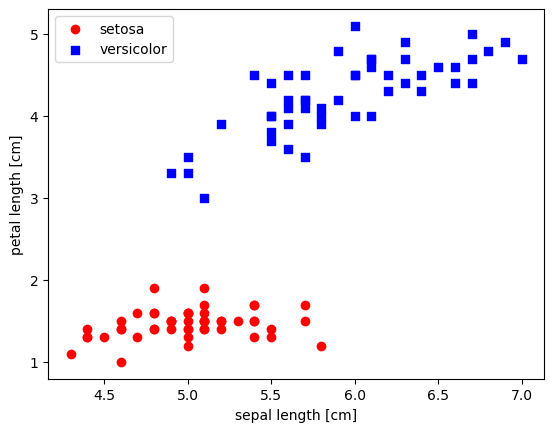

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# setosa와 versicolor를 선택합니다.
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# 꽃받침 길이와 꽃잎 길이를 추출합니다.
X = df.iloc[0:100, [0, 2]].values

# 산점도를 그립니다.
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

산점도는 붓꽃 데이터셋에 있는 샘플들이 꽃받침 길이와 꽃잎 길이에 따라 어떻게 분포되어 있는지 시각화한다.

2개의 특성이 선형적으로 구분되는 것을 확인할 수 있다. (선형적으로 구분할 수 있다는 것은 산점도에서 두 클래스가 선형 경계로 구분된다는 것을 의미한다.)

[1, 3, 3, 2, 1, 0, 0, 0, 0, 0]


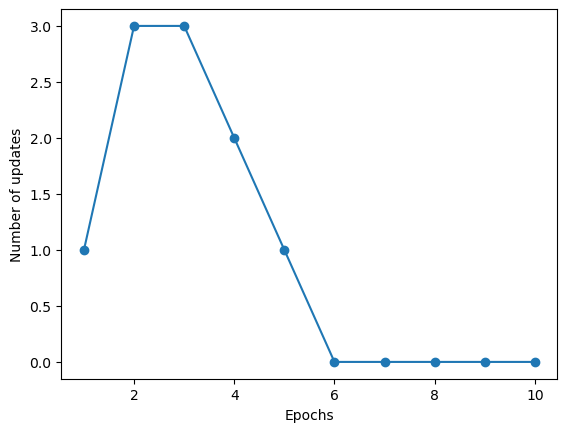

In [5]:
ppn = Perceptron(eta=0.2, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
print(ppn.errors_)
plt.show()

**결정 경계를 시각화**

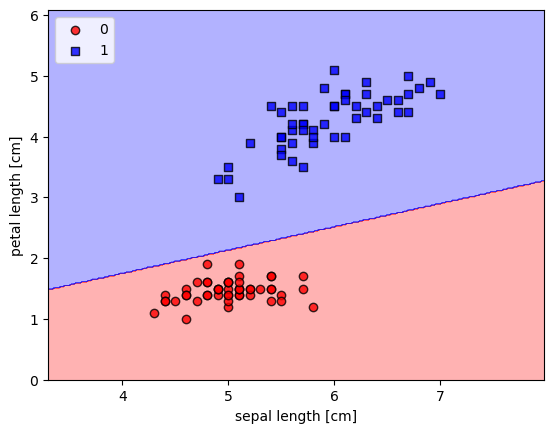

In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
  # 마커와 컬러맵을 설정합니다.
  makers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  
  # 결정 경계를 그립니다.
  x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  
  # 샘플의 산점도를 그립니다.
  for i, c in enumerate(np.unique(y)):
    plt.scatter(x=X[y == c, 0], y=X[y == c, 1], alpha=0.8, c=colors[i], marker=makers[i], label=c, edgecolor='black')
    
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## 2.3 적응형 선형 뉴런과 학습의 수렴

퍼셉트론의 학습 규칙은 간단하지만, 특정 조건에서 수렴하지 않을 수 있다. 이는 훈련 샘플이 선형적으로 구분되지 않을 때 발생한다. 이러한 문제를 해결하기 위해 적응형 선형 뉴런 아달린(Adaline)을 사용한다.

아달린(Adaline)은 테드 호프가 프랑크 로젠블라트의 퍼셉트론 학습 규칙을 개선한 알고리즘이다. 아달린은 가중치를 업데이트하는 데 퍼셉트론의 계단 함수 대신 선형 활성화 함수를 사용한다. 이 활성화 함수는 실수 입력을 출력으로 변환하는데 사용된다.

### 2.3.1 경사 하강법으로 손실 함수 최소화


아달린은 계산된 출력과 진짜(?) 클래스 레이블 사이의 `평균 제곱 오차(Mean Squared Error, MSE)`로 모델 파라미터(가중치와 절편)를 학습하기 위한 손실함수 L을 정의한다.

$$ L(w, b) = -\frac{1}{n} \sum_{i}(y^{(i)} - \sigma(z^{(i)}))^2 $$

이 손실 함수를 최소화하기 위해 경사 하강법을 사용한다. 이는 손실 함수의 기울기를 따라 가중치를 업데이트한다.


### 2.3.2 파이썬으로 아달린 구현

In [7]:
class AdalineGD:
  
  def __init__(self, eta=0.01, n_iter=50, random_state=1) -> None:
    """Adaline 분류기를 초기화합니다.

    Args:
        eta (float, optional): 학습률(0~1사이의 실수). Defaults to 0.01.
        n_iter (int, optional): 훈련 데이터셋 반복 횟수. Defaults to 50.
        random_state (int, optional): 가중치 무작위 초기화를 위한 난수 생성 시드. Defaults to 1.
    """
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
    
    
  def net_input(self, X):
    """입력 계산

    Args:
        X (_type_): 입력 값

    Returns:
        NDArray: 입력 계산 결과
    """
    return np.dot(X, self.w_) + self.b_
    
    
  def activation(self, X):
    """선형 활성화 계산
    """
    return X
  
  def predict(self, X):
    """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다

    Args:
        X (_type_): 입력 값

    Returns:
        _type_: 클래스 레이블
    """
    return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
    
  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
    self.b_ = np.float_(0.)
    self.losses_ = []
    
    for _ in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
      self.b_ += self.eta * 2.0 * errors.mean()
      loss = (errors ** 2).mean()
      self.losses_.append(loss)
    return self

퍼셉트론처럼 개별 훈련 샘플마다 평가한 후 가중치를 업데이트하지 않고 전체 훈련 데이터셋을 기반으로 기울기를 계산한다.

* 절편 유닛이 경유 `self.eta * 2.0 * errors.mean()`로 계산된다.
* errors는 편도 함수 값$\frac{\partial L}{\partial w_{j}}$를 담은 배열이다.
* 이 값은 각 훈련 샘플의 특성 $x_{j}$에 대한 가중치의 업데이트를 계산하기 위해 사용된다.

하지만 편도 함수$\frac{\partial L}{\partial w_{j}}$을 통한 가중치 업데이트는 특성 값 $x_{j}$를 사용한다.

각 가중치에 대한 특성값과 오차를 곱해 계산할 수 있다.

```python
for w_j in range(self.w_.shape[0]):
  self.w_[w_j] += self.eta * (2.0 (X[:, w_j]*errors)).mean()
```

루프를 사용하지 않고 계산할 수 있다.

```python
self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
```



좋은 학습률을 찾기 위해 아달린에 학습률을 0.1과 0.0001로 설정하여 실험한다.

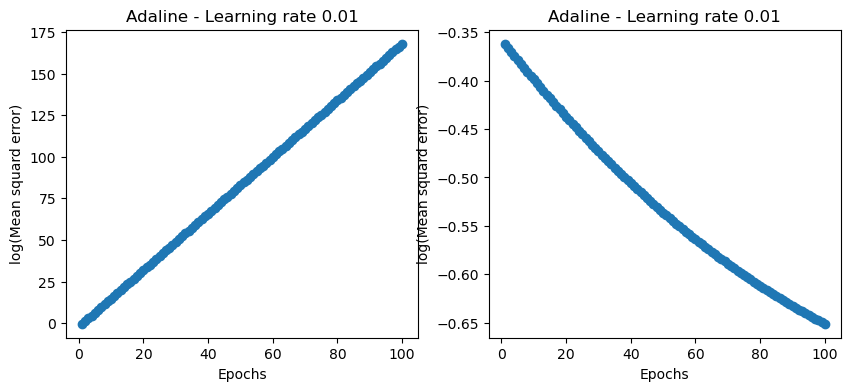

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2 , figsize=(10, 4)) # 1행 2열의 그래프를 그릴 준비를 한다.
ada1 = AdalineGD(n_iter=100, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) +1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squard error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter=100, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) +1), np.log10(ada2.losses_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Mean squard error)')
ax[1].set_title('Adaline - Learning rate 0.01')
plt.show()

**0.1을 설정했을 때 문제**
* 0.1은 학습률이 클때 발생하는 문제를 보여준다. 
* 손실 함수를 최소화 하지 못하고 MSE는 에포크마다 증가한다.
* 이는 전역 최솟값을 지나쳤기 때문이다.

**0.0001을 설정했을 때 문제**
* 손실은 감소하지만 너무 작은 학습률은 수렴하는데 많은 에포크가 필요하다.

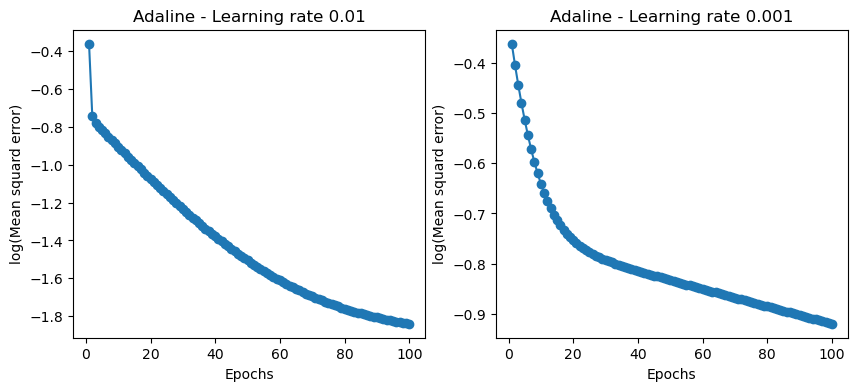

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2 , figsize=(10, 4)) # 1행 2열의 그래프를 그릴 준비를 한다.
ada1 = AdalineGD(n_iter=100, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) +1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squard error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter=100, eta=0.001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) +1), np.log10(ada2.losses_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Mean squard error)')
ax[1].set_title('Adaline - Learning rate 0.001')
plt.show()

0.01과 0.001을 사용하고 에포크는 100번으로 설정한다.

양쪽 모두 그럴싸한 결과를 보여준다. ?

### 2.3.3 특성 스케일을 조정하여 경사 하강법 결과 향상

경사 하강법은 특성 스케일을 조정하여 혜택을 볼 수 있는 많은 알고리즘 중 하나이다.

**표준화**라고 하는 특성 스케일 방법을 사용한다.

표준화는 경사 하강법 학습이 좀더 빠르게 수렴되도록 돕는다. 표준화는 각 특성의 평균을 0, 표준편차를 1로 만든다.

$$
x_{j}^{'} = \frac{x_{j} - \mu_{j}}{\sigma_{j}}
$$

여기에서$x_{j}$는 n개의 모든 샘플에서$j$번째 특성 값을 포함한 벡터이다.

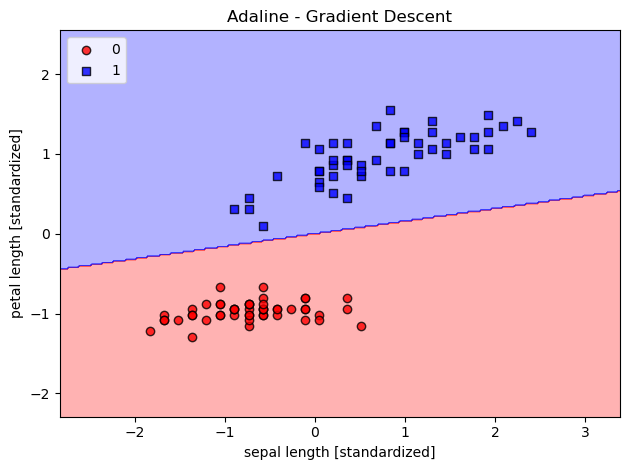

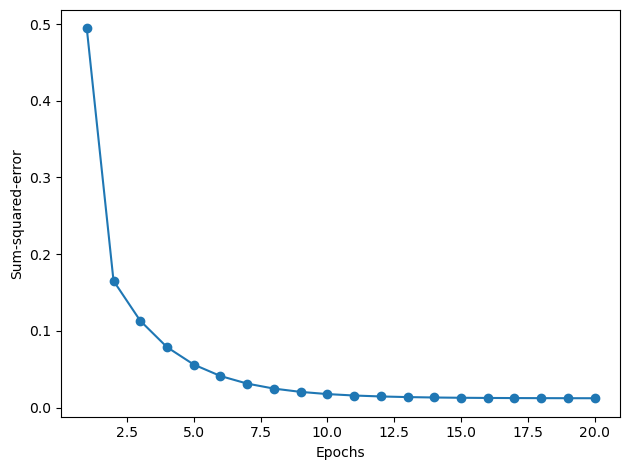

In [10]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

표준화된 특성에서 훈련하니 아달린 모델이 수렴되었다. 학습률은 0.5로 설정되어 있다.
모든 샘플은 완벽하게 분류되었다.

### 2.3.4 대규모 머신 러닝과 확률적 경사 하강법

확률적 경사 하강법(stochastic gradient descent)은 대규모 머신 러닝 문제를 다루는데 사용된다.

$$
\Delta w_{j} = \frac{2\eta}{n} \sum_{i=1}^{n}(y^{(i)} - \sigma(z^{(i)}))x_{j}^{(i)}
$$
$$
\Delta w_{j} = \eta(y^{(i)} - \phi(z^{(i)}))x_{j}^{(i)}, \Delta b = \eta(y^{(i)} - \phi(z^{(i)}))
$$

확률적 경사 하강법은 가중치가 자주 업데이트 되어 빠르게 수렴된다.

그레이디언트가 하나의 훈련샘플을 기반으로 계산되므로 오차의 궤적은 배치 경사 하강법보다 복잡하다.

비선형 손실 함수를 다룰 때 얕은 지역 최솟값을 더 쉽게 탈출할 수 있다.

확률적 경사 하강법은 온라인 학습으로 사용할 수 있다.

In [19]:
class AdalineSGD:
  """ADAptive LInear NEuron 분류기
  """
  def __init__(self, eta=0.1, n_iter=10, shuffle=True, random_state=None):
    """Adaline 분류기를 초기화합니다.

    Args:
        eta (float, optional): 학습률. Defaults to 0.1.
        n_iter (int, optional): 훈련 데이터셋 반복 횟수. Defaults to 10.
        shuffle (bool, optional): True로 설정하면 같은 반복이 되지 않도록 에포크마다 훈련 데이터를 섞는다.. Defaults to True.
        random_state (int, optional): 가중치 무작위 초기화를 위한 난수 생성 시드. Defaults to None.
    """
    self.eta = eta
    self.n_iter = n_iter
    self.w_initialized = False
    self.shuffle = shuffle
    self.random_state = random_state
    
  def _shuffle(self, X, y):
    r = self.rgen.permutation(len(y))
    """
    RandomState.permutation :
    Randomly permute a sequence, or return a permuted range.

    If x is a multi-dimensional array, it is only shuffled along its first index.
    """
    return X[r], y[r]
    
  def _initialize_weights(self, m):
    """가중치를 무작위로 초기화합니다.

    Args:
        m (int): 특성의 개수
    """
    self.rgen = np.random.RandomState(self.random_state)
    self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
    
    self.b_ = np.float_(0.)
    self.w_initialized = True
    
  def _update_weights(self, xi, target):
    """아달린 학습 규칙을 적용하여 가중치를 업데이트합니다.

    Args:
        xi (_type_): 입력 값
        target (_type_): 타깃 값
    """
    output = self.activation(self.net_input(xi))
    error = (target - output)
    self.w_ += self.eta * 2.0 * xi * (error)
    self.b_ += self.eta * 2.0 * error
    loss = error ** 2
    return loss
  
  def net_input(self, X):
    """입력 계산

    Args:
        X (_type_): 입력 값

    Returns:
        NDArray: 입력 계산 결과
    """
    return np.dot(X, self.w_) + self.b_
  
  def activation(self, X):
    """선형 활성화 계산
    """
    return X
  
  def predict(self, X):
    """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다

    Args:
        X (_type_): 입력 값

    Returns:
        _type_: 클래스 레이블
    """
    return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
    
  def fit(self, X, y):
    """훈련 데이터 학습

    Args:
        X ({array-like}, shape = [n_samples, n_features]): n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y (array-like, shape = [n_samples]): 타깃 벡터

    Returns:
        AdalineSGD: self
    """
    self._initialize_weights(X.shape[1])
    self.losses_ = []
    for _ in range(self.n_iter):
      if self.shuffle:
        X, y = self._shuffle(X, y)
      losses = []
      for i, target in zip(X, y):
        losses.append(self._update_weights(i, target))
      avg_loss = np.mean(losses)
      self.losses_.append(avg_loss)
    return self
  
  def partial_fit(self, X, y):
    """가중치를 다시 초기화하지 않고 훈련 데이터를 학습합니다.
    """
    if not self.w_initialized:
      self._initialize_weights(X.shape[1])
      if y.ravel().shape[0] > 1:
        for i, t in zip(X, y):
          self._update_weights(i, t)
      else:
        self._update_weights(X, y)
      return self
    

AdalineSGD클래스에서 사용하는`_shuffle`메서드는 `np.random`모듈의 `permutation`함수로 0에서 100까지 중복되지 않는 랜덤한 숫자 시퀀스를 생성한다.이 숫자 시퀀스를 특성 행렬과 클래스 레이블 벡터를 섞는데 사용한다.

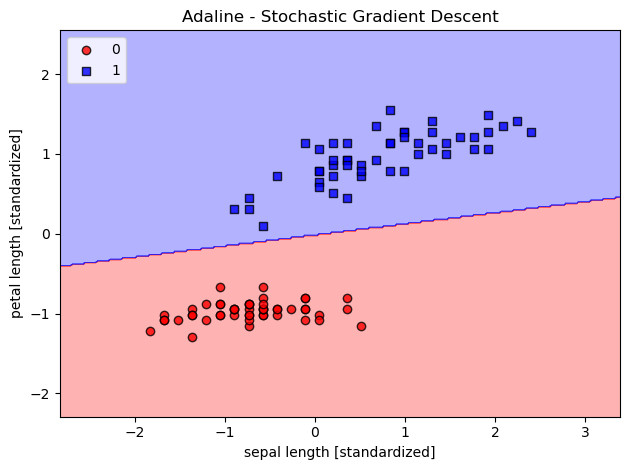

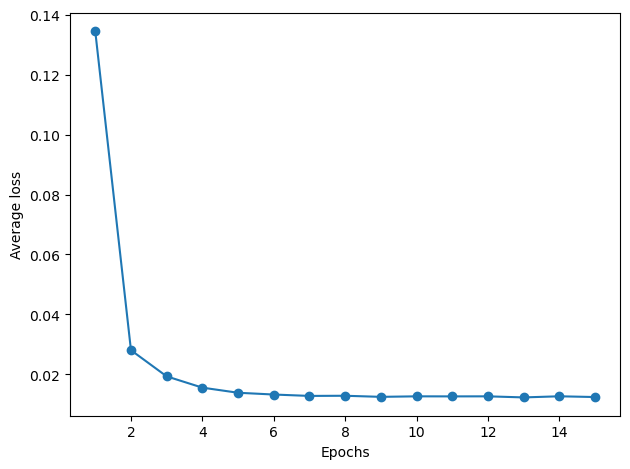

In [21]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.tight_layout()
plt.show()

여기서 보듯이 평균 손실이 상당히 빠르게 감소한다. 이는 확률적 경사 하강법이 더 빠르게 수렴되기 때문이다.
`partial_fit`메서드를 사용하여 새로운 데이터를 훈련할 수 있다.